In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy 
import math
%matplotlib inline

In [19]:
# create a data set about restaurant to implement linear regression with one variable to predict profits for a restaurant franchise.

# create a dataset for linear regression
restaurant_data = {'Population': [1.2, 2.4, 3.5, 4.7, 5.9, 6.2, 7.4, 8.6, 9.8, 10.1],
                   'Profits': [2.5, 4.8, 6.7, 8.9, 11.1, 11.4, 13.6, 15.8, 18.0, 18.3]}

# convert the dataset into a pandas DataFrame
df = pd.DataFrame(restaurant_data)

# display the dataset
print(df)

   Population  Profits
0         1.2      2.5
1         2.4      4.8
2         3.5      6.7
3         4.7      8.9
4         5.9     11.1
5         6.2     11.4
6         7.4     13.6
7         8.6     15.8
8         9.8     18.0
9        10.1     18.3


In [44]:
from sklearn.model_selection import train_test_split

# Split the data into features (x) and target variable (y)
x = df['Population']
y = df['Profits']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the training sets
print("Type of x_train: ", type(x_train))
print("Shape of x_train: ", x_train.shape)
print("X_train:", x_train)
print("Type of y_train: ", type(y_train))
print("Shape of y_train: ", y_train.shape)
print("Y_train:", y_train)

Type of x_train:  <class 'pandas.core.series.Series'>
Shape of x_train:  (8,)
X_train: 5     6.2
0     1.2
7     8.6
2     3.5
9    10.1
4     5.9
3     4.7
6     7.4
Name: Population, dtype: float64
Type of y_train:  <class 'pandas.core.series.Series'>
Shape of y_train:  (8,)
Y_train: 5    11.4
0     2.5
7    15.8
2     6.7
9    18.3
4    11.1
3     8.9
6    13.6
Name: Profits, dtype: float64


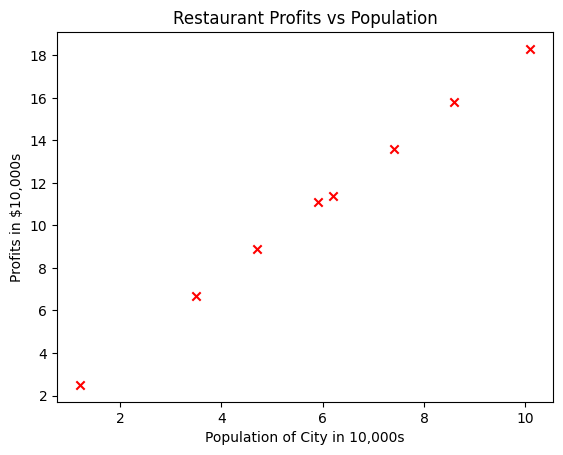

In [30]:
# Visualize the training data
# Create a scatter plot. 
plt.scatter(x_train, y_train,marker='x', color='red')
#set the title of the plot
plt.title('Restaurant Profits vs Population')
# Y-axis label
plt.ylabel('Profits in $10,000s')
# X-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [32]:
# compute cost function
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # Number of training examples
    m = len(x)
    
    # Return this variable correctly
    total_cost = 0
    
    for i in range(m):
        total_cost += (w*x[i] + b - y[i])**2
        
    total_cost = total_cost/(2*m)
    
    return total_cost

In [34]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    m = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        dj_dw += ((w*x[i]+b)-y[i])*x[i]
        dj_db += ((w*x[i]+b)-y[i])
        
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [39]:
def gradient_descent(x, y, w, b, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    m = len(x)
    # an array to store cost J and w's at each  iteration - primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w) # make a copy of the initial value of w so that it is not changed in global scope
    b = b
  # Ensure x_train and y_train are numpy arrays
    if isinstance(x, (pd.DataFrame, pd.Series)):
        x = x.values
    if isinstance(y, (pd.DataFrame, pd.Series)):
        y = y.values

    
    for i in range(num_iters):
      
        #calculate the gradient
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        #update w and b
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        #save the cost and w at each iteration
        J_history.append(cost_function(x, y, w, b))
        
        w_history.append(w)
        print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    
    return w, b, J_history, w_history   

In [50]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b) 

Iteration    0: Cost    23.17   
Iteration    1: Cost     7.45   
Iteration    2: Cost     2.40   
Iteration    3: Cost     0.78   
Iteration    4: Cost     0.25   
Iteration    5: Cost     0.09   
Iteration    6: Cost     0.03   
Iteration    7: Cost     0.02   
Iteration    8: Cost     0.01   
Iteration    9: Cost     0.01   
Iteration   10: Cost     0.01   
Iteration   11: Cost     0.01   
Iteration   12: Cost     0.01   
Iteration   13: Cost     0.01   
Iteration   14: Cost     0.01   
Iteration   15: Cost     0.01   
Iteration   16: Cost     0.01   
Iteration   17: Cost     0.01   
Iteration   18: Cost     0.01   
Iteration   19: Cost     0.01   
Iteration   20: Cost     0.01   
Iteration   21: Cost     0.01   
Iteration   22: Cost     0.01   
Iteration   23: Cost     0.01   
Iteration   24: Cost     0.01   
Iteration   25: Cost     0.01   
Iteration   26: Cost     0.01   
Iteration   27: Cost     0.01   
Iteration   28: Cost     0.01   
Iteration   29: Cost     0.01   
Iteration 

In [52]:
m = len(x_train)
predicted = np.zeros(m)

# Ensure x_train and y_train are numpy arrays
if isinstance(x_train, (pd.DataFrame, pd.Series)):
        x_train = x_train.values
if isinstance(y_train, (pd.DataFrame, pd.Series)):
        y_train = y_train.values
        
for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

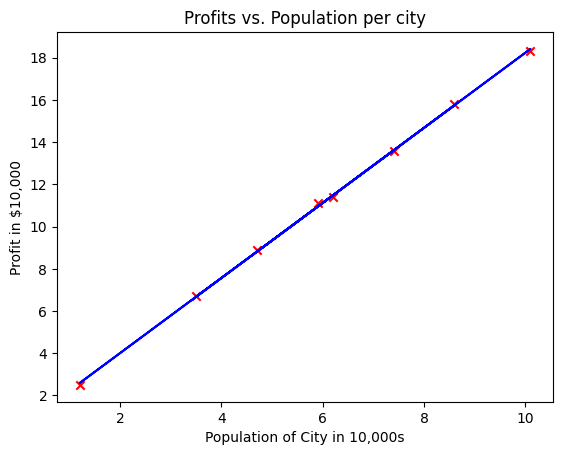

In [53]:
# plot the linear fit on the training data
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [54]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $66768.26
For population = 70,000, we predict a profit of $129020.10
